In [ ]:
##
# Web app: https://ssd.jpl.nasa.gov/horizons/app.html
# API: https://ssd-api.jpl.nasa.gov/doc/horizons.html
# Astroquery Python API: https://astroquery.readthedocs.io/en/latest/jplhorizons/jplhorizons.html


In [ ]:
import requests

EXAMPLE = "https://ssd.jpl.nasa.gov/api/horizons.api?format=json&COMMAND='499'&OBJ_DATA='YES'&MAKE_EPHEM='YES'&EPHEM_TYPE='OBSERVER'&CENTER='500@399'&START_TIME='2006-01-01'&STOP_TIME='2006-01-20'&STEP_SIZE='1%20d'&QUANTITIES='1,9,20,23,24,29'"
r = requests.get(EXAMPLE)




In [ ]:
print(r.json()['result'])

*******************************************************************************
 Revised: June 21, 2016                 Mars                            499 / 4
 
 PHYSICAL DATA (updated 2019-Oct-29):
  Vol. mean radius (km) = 3389.92+-0.04   Density (g/cm^3)      =  3.933(5+-4)
  Mass x10^23 (kg)      =    6.4171       Flattening, f         =  1/169.779
  Volume (x10^10 km^3)  =   16.318        Equatorial radius (km)=  3396.19
  Sidereal rot. period  =   24.622962 hr  Sid. rot. rate, rad/s =  0.0000708822 
  Mean solar day (sol)  =   88775.24415 s Polar gravity m/s^2   =  3.758
  Core radius (km)      = ~1700           Equ. gravity  m/s^2   =  3.71
  Geometric Albedo      =    0.150                                              

  GM (km^3/s^2)         = 42828.375214    Mass ratio (Sun/Mars) = 3098703.59
  GM 1-sigma (km^3/s^2) = +- 0.00028      Mass of atmosphere, kg= ~ 2.5 x 10^16
  Mean temperature (K)  =  210            Atmos. pressure (bar) =    0.0056 
  Obliquity to orbit    =  

In [ ]:
! pip3 install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from astroquery.jplhorizons import Horizons

## PDObsLat/Lon = position on the surface of the *earth*, looking at the center of *venus*
#obj = Horizons(id='399',  # Earth body center
#               location='500@299',  # Venus body center
#               epochs={'start':'2010-01-01', 'stop':'2010-01-02', 'step':'4h'})

# PDObsLat/Lon = position on the surface of the *Venus* ~closest to Arecibo on *Earth*
obj = Horizons(id='299',  # Venus
               location='-1@399',  # Arecibo on Earth
               epochs={'start':'2022-11-28', 'stop':'2022-11-29', 'step':'4h'})
eph = obj.ephemerides()
print(eph)

 targetname    datetime_str      datetime_jd    ... alpha_true  PABLon   PABLat
    ---            ---                d         ...    deg       deg      deg  
----------- ----------------- ----------------- ... ---------- -------- -------
Venus (299) 2022-Nov-28 00:00         2459911.5 ...    12.2899 260.5691 -0.4283
Venus (299) 2022-Nov-28 04:00 2459911.666666667 ...     12.344 260.8061 -0.4392
Venus (299) 2022-Nov-28 08:00 2459911.833333333 ...    12.3978 261.0434 -0.4503
Venus (299) 2022-Nov-28 12:00         2459912.0 ...    12.4524 261.2802 -0.4617
Venus (299) 2022-Nov-28 16:00 2459912.166666667 ...    12.5084 261.5163  -0.473
Venus (299) 2022-Nov-28 20:00 2459912.333333333 ...    12.5648 261.7522 -0.4841
Venus (299) 2022-Nov-29 00:00         2459912.5 ...    12.6202 261.9886  -0.495


In [ ]:
print(eph['PDObsLon'])
print(eph['PDObsLat'])

 PDObsLon
   deg   
---------
65.557753
66.014885
66.472398
66.928966
67.384204
67.839057
68.294852
PDObsLat
  deg   
--------
1.143596
1.146636
1.150138
1.154118
1.158096
1.161578
1.164553


In [ ]:
eph

targetname,datetime_str,datetime_jd,solar_presence,flags,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,V,surfbright,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,lunar_elong,lunar_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
---,---,d,---,---,deg,deg,deg,deg,arcsec / h,arcsec / h,deg,deg,arcsec / min,arcsec / min,arcsec,arcsec,deg,---,---,mag,mag,mag / arcsec2,%,arcsec,arcsec,---,arcsec,deg,deg,deg,deg,deg,arcsec,deg,arcsec,deg,deg,AU,km / s,AU,km / s,min,km / s,km / s,deg,---,deg,deg,%,deg,deg,deg,deg,---,s,deg,deg,deg,deg,deg,deg,---,min,arcsec,arcsec,arcsec,arcsec,deg,arcsec2,arcsec,km,km / s,Hz,Hz,s,deg,---,deg,deg,deg
str11,str17,float64,str1,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64
Venus (299),2022-Nov-28 00:00,2459911.5,,m,253.07044,-22.78467,253.40523,-22.82213,186.7205,-26.8923,252.123986,-21.946665,164.12,-812.29,32179.838,-5628.85,101.755,0.0082280242,999.0,--,-3.907,0.798,98.85415,0.1135,32490.57,*,9.906114,65.557753,1.143596,77.849679,1.278924,278.15,1.05,7.3879,4.952,266.7186,-0.596,0.726798826502,0.1662423,1.68465488594881,-2.4436762,14.01084745,34.8531583,64.0732519,9.0252,/T,12.2956,45.7,21.2106,158.6792,98.276,280.126,0.36037,Oph,69.182976,254.7373085,-0.2589776,272.76,67.16,358.253977,13.364517,19.7539803234,0.000354,--,--,--,--,--,--,--,--,--,--,--,--,135.4281,7.114546276,12.2899,260.5691,-0.4283
Venus (299),2022-Nov-28 04:00,2459911.666666667,,,253.29608,-22.81502,253.63095,-22.852,187.6504,-26.9735,247.884383,-76.728834,-248.17,-790.46,32325.71,-5631.88,101.727,4.0191800405,999.0,--,-3.906,0.798,98.84408,0.1145,32633.54,*,9.907571,66.014885,1.146636,78.360899,1.289561,278.1,1.06,7.3045,4.953,266.9827,-0.6115,0.72681479122,0.1654609,1.68440728890364,-2.7499726,14.00878825,34.8523887,64.3922551,9.0649,/T,12.3498,47.9,22.8313,158.5853,98.226,280.039,0.35415,Oph,69.182982,254.9473863,-0.2651794,272.76,67.16,358.358979,13.180885,23.7529090983,0.000354,--,--,--,--,--,--,--,--,--,--,--,--,135.6928,11.110449768,12.344,260.8061,-0.4392
Venus (299),2022-Nov-28 08:00,2459911.833333333,,,253.52216,-22.84558,253.85721,-22.88207,187.3201,-27.1719,104.237085,-46.326346,44.05,827.15,32472.032,-5633.24,101.696,8.0301320245,999.0,--,-3.906,0.799,98.83403,0.1155,32776.73,*,9.909247,66.472398,1.150138,78.87211,1.30017,278.04,1.06,7.2208,4.954,267.2467,-0.6269,0.726830680567,0.1646759,1.68412235579875,-3.1494536,14.00641854,34.8516227,64.2985506,9.1046,/T,12.4035,50.9,25.0604,158.4918,98.174,279.951,0.34838,Oph,69.182988,255.157918,-0.2718447,272.76,67.16,358.463651,12.996582,3.7518155908,0.000354,--,--,--,--,--,--,--,--,--,--,--,--,135.9576,-8.893682244,12.3978,261.0434,-0.4503
Venus (299),2022-Nov-28 12:00,2459912.0,*,,253.74726,-22.8762,254.08255,-22.91221,186.0988,-27.0053,117.108806,7.254538,330.22,759.48,32621.716,-5633.73,101.664,12.0410839749,7.378,1.786,-3.906,0.799,98.82377,0.1166,32923.1,*,9.911081,66.928966,1.154118,79.383312,1.310751,277.99,1.07,7.1374,4

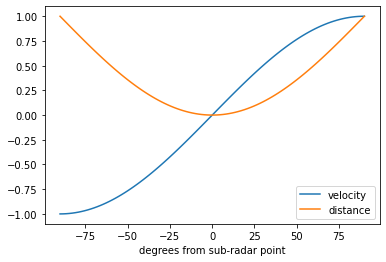

In [53]:
from matplotlib import pylab as plt
import numpy as np

a = np.linspace(-np.pi / 2, np.pi / 2, 100)

plt.plot(a * 180 / np.pi, np.sin(a), label='velocity')
plt.plot(a * 180 / np.pi, 1 - np.cos(a), label='distance')
plt.xlabel('degrees from sub-radar point')
plt.legend()

Text(0, 0.5, 'delta angle (rad) from SRP')

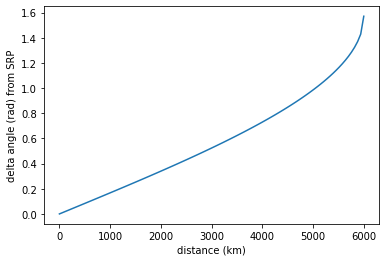

In [59]:
dist = np.linspace(0, 6000, 100)
plt.plot(dist, np.arccos(-dist / 6000) - np.pi/2)
plt.xlabel('distance (km)')
plt.ylabel('delta angle (rad) from SRP')

Text(0, 0.5, 'delta angle (rad) from SRP')

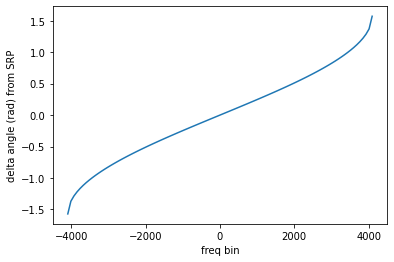

In [61]:
freq = np.linspace(-4096, 4096, 100)
plt.plot(freq, np.arcsin(freq / 4096))
plt.xlabel('freq bin')
plt.ylabel('delta angle (rad) from SRP')

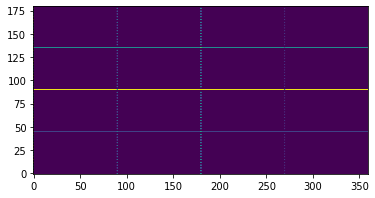

In [86]:
G = np.zeros((360,180))

def setLL(lon, lat, v):
  G[lon, lat - 90] = v

for lon in range(360):
  setLL(lon, 0, 1)
  setLL(lon, 45, 0.5)
  setLL(lon, -45, 0.2)

for lat in range(-90, 90, 3):
  setLL(0, lat, 1)
  setLL(90, lat, 0.5)
  setLL(180, lat, 1)
  setLL(270, lat, 0.2)

plt.imshow(G.T, origin='upper left')

(90., 0.) deg
(1.6923669, 0.12068203, 1.01481649) (rad, rad, )
(90., 20.) deg
(1.69796493, 0.46736745, 1.01395585) (rad, rad, )
(90., 40.) deg
(1.70609298, 0.81512137, 1.01177336) (rad, rad, )
(90., 60.) deg
(1.72453867, 1.16447802, 1.0092858) (rad, rad, )
(90., 80.) deg
(1.94940424, 1.51380573, 1.00765884) (rad, rad, )


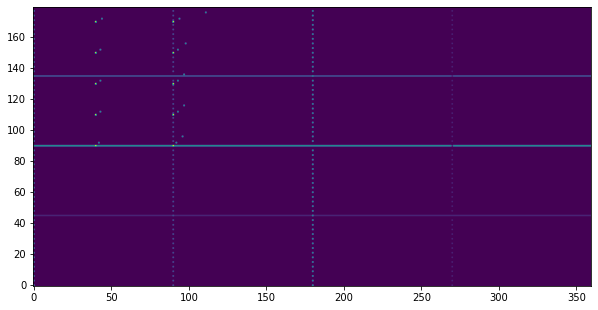

In [91]:
import astropy.coordinates as ac

for lat in range(0, 90, 20):
    p = ac.UnitSphericalRepresentation(ac.Longitude(90, unit='degree'), ac.Latitude(lat, unit='degree'))
    print(p)
    setLL(int(p.lon.degree), int(p.lat.degree), 2)
    d = ac.UnitSphericalDifferential(ac.Angle(7, unit='degree'), ac.Angle(7, unit='degree'))
    p1 = p + d
    print(p1)
    setLL(int(p1.lon.degree), int(p1.lat.degree), 1)

plt.figure(figsize=(10, 10))
plt.imshow(G.T, origin='upper left')

In [81]:
p.lon.degree

40.0